In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')
df.columns=[column.strip() for column in df.columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


<AxesSubplot:title={'center':'bmi'}, xlabel='work_type'>

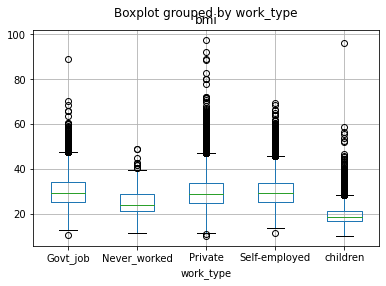

In [3]:
df.boxplot(by='work_type',column=['bmi'])

In [4]:
# imbalanced data
df.groupby(['stroke']).count()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,42617,42617,42617,42617,42617,42617,42617,42617,42617,41295,29470
1,783,783,783,783,783,783,783,783,783,643,638


In [6]:
# Drop the 'id' column as it is not useful for prediction
df = df.drop(columns=['id'])


In [7]:
# Handling missing values in 'bmi' and 'smoking_status'
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'].fillna('unknown', inplace=True)


In [8]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [9]:
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled,y_train)
y_predict=svm_model.predict(X_test_scaled)
score = accuracy_score(y_test,y_predict)
print("Accuracy:", score)

Accuracy: 0.7784946236559139


In [16]:
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')
roc_auc = roc_auc_score(y_test, y_predict, multi_class='ovr')

conf_matrix = confusion_matrix(y_test, y_predict)
mcc = matthews_corrcoef(y_test, y_predict)

precision_recall = precision_recall_curve(y_test, y_predict)

pr_auc = auc(precision_recall[1], precision_recall[0])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"AUC-PR: {pr_auc:.4f}")


Precision: 0.9742
Recall: 0.7785
F1 Score: 0.8597
Confusion Matrix:
[[9990 2795]
 [  89  146]]
AUC-PR: 0.3389
